This notebook shows how many cells and genes have been removed by QC. It is useful to see if there are "consistent" QC issues across samples or if there are sample outliers. It is also important to gain the perspective, within-sample, how many cells were affected by a certain QC issue to gain insight about the sample's state. 

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd

Import obj with the cell/gene numbers removed from the dataset

In [ ]:
import pickle

file = open('dict_diagn', 'rb')    
dict_cells, dict_genes = pickle.load(file)
for keys in dict_cells:  #check if the dictionaries were saved properly
    print(keys, '=>', dict_cells[keys], dict_genes[keys])
file.close()


# make dataframe with the cell metrics
df = pd.DataFrame(dict_cells, index=['count outlier min', 'count outlier max', 'ribo outlier', 'mito outlier', 'doublets', 'cells after QC'])
df = df.T

Plot the number of cells that were filtered out at each step. 

In [ ]:
fig, ax = plt.subplots(figsize=(4, 2)) 

# creates a barplot of cells at filtering steps with cell number before filteirng on top of bars and final cell number after filtering inside bars.

df.plot(kind='bar', stacked=True, color=['#1E565C', '#069AAB', '#FF5050', '#FFF37C', '#0EB747', '#ABFFFF'], logy=True, ax=ax)
ax=plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 2, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})


cumulative = df.cumsum(axis=1)
top_col = df.columns[-1] 

for idx in range(len(df)):
    x = idx
    top_segment_value = df.iloc[idx][top_col]
    total_height = cumulative.iloc[idx][top_col]

    if total_height > 0:
        ax.text(
            x,
            total_height,
            f'{total_height:.0f}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='#848484'
        )

    if top_segment_value > 0:
        ax.text(
            x,
            total_height - top_segment_value / 1.5,  
            f'{top_segment_value:.0f}',
            ha='center',
            va='center',
            fontsize=8,
            color='black'
        )
plt.title('Cells At Filtering Steps', weight='bold')
plt.savefig('new_data/plots/diagnostic_qc/qc_diagnostic_cells.png', dpi=300, bbox_inches='tight')
plt.show()


Plot the number of genes filtered out at each step. Most genes in our dataset were removed after cell removal due to very low expression. The gene-filtering steps could be very useful as thousands of genes could be removed after cell-filtering which leaves out more informative genes.

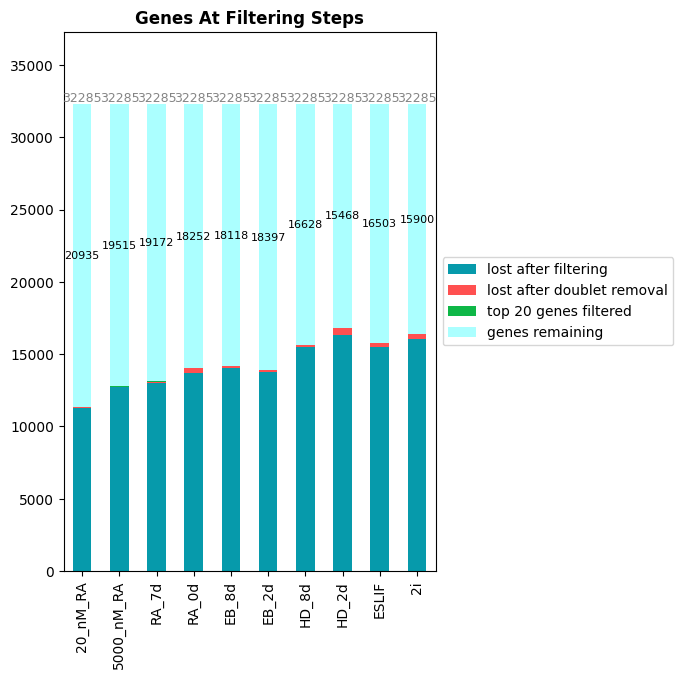

In [13]:
#make dataframe with filtered gene numbers
df2 = pd.DataFrame(dict_genes, index=['lost after filtering', 'lost after doublet removal', 'top 20 genes filtered','genes remaining'])
df2 = df2.T.astype(int)
fig, ax = plt.subplots(figsize=(3, 7)) 
df2.plot(kind='bar', stacked=True, color=['#069AAB', '#FF5050', '#0EB747','#ABFFFF'], ax=ax)

# creates a barplot of genes at filtering steps with genes number before filteirng on top of bars and final genes number after filtering inside bars.
ax=plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 10})

cumulative = df2.cumsum(axis=1)
top_col = df2.columns[-1]  # Top of the stack

for idx in range(len(df2)):
    x = idx
    top_segment_value = df2.iloc[idx][top_col]
    total_height = cumulative.iloc[idx][top_col]
    # 1. Label above the bar (cumulative total)
    if total_height > 0:
        ax.text(
            x,
            total_height,
            f'{total_height:.0f}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='#848484'
        )

    # 2. Label inside the top segment (just top segment value)
    if top_segment_value > 0:
        ax.text(
            x,
            total_height - top_segment_value / 2,  # Midpoint of top segment
            f'{top_segment_value:.0f}',
            ha='center',
            va='center',
            fontsize=8,
            color='black'
        )
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin, ymax * 1.1) 
# plt.yscale("log")
plt.title('Genes At Filtering Steps', weight='bold')
plt.savefig('new_data/plots/diagnostic_qc/qc_diagnostic_genes.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
df2

,lost after filtering,lost after doublet removal,top 20 genes filtered,genes remaining
20_nM_RA,11247,83,20,20935
5000_nM_RA,12727,23,20,19515
RA_7d,12985,108,20,19172
RA_0d,13665,348,20,18252
EB_8d,14067,80,20,18118
EB_2d,13746,122,20,18397
HD_8d,15487,150,20,16628
HD_2d,16320,477,20,15468
ESLIF,15513,249,20,16503
2i,16070,295,20,15900
